# How many data out there? 
We will retrieve all the cells at lower resolution. Check if they have data (children) and then convert it to raster ("not take much time on this).

## Later 
In this exercise I'll perform a spatial autocorrelation model using the tools available in spystats and the data stored in *Biospytial*
In particular estimate a richness model.


In [7]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph
from drivers.graph_models import Cell,Mex4km, countObjectsOf
import pandas as pd
import matplotlib.pyplot as plt

## Use a wkt to define a polygon and retrieve a list of trees

In [9]:
from traversals.strategies import sumTrees, UniformRandomSampleForest,PolygonToTrees
from mesh.models import initMesh
#polystr = 'POLYGON((-92.24837214921502948 16.53658521768252854,-92.11186028915844304 16.52849027585105901,-92.10623093410457329 16.37327180168962926,-92.25118682674197146 16.37462206197250225,-92.24837214921502948 16.53658521768252854))'
polystr = 'POLYGON((-92.54989447928841173 16.93450143453089396,-91.70267654367958698 16.9021871200489322,-91.68015912346406537 16.28717344210308937,-92.56396786692310741 16.31959139053146757,-92.54989447928841173 16.93450143453089396))'
%time trees = PolygonToTrees(polystr)

DEBUG Changed MESH TABLE SPACE
INFO Getting information. DEveloper! You can make this faster if you use Batchmode for py2neo.
INFO Retrieving the Tree Structures. 
 Get a coffee this will take time.


CPU times: user 5min 1s, sys: 12.5 s, total: 5min 14s
Wall time: 8min 6s


![Demo Region](../demoregionmex.png)

The grid. Esach cell corresponds to a Taxonomic Tree

In [10]:
%time big_t = reduce(lambda a,b : a+b, trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging

CPU times: user 23min 17s, sys: 3.01 s, total: 23min 20s
Wall time: 23min 30s


In [7]:
import traversals.strategies as strg
root = trees[0].node

In [8]:
environment = strg.getEnvironmentalCovariatesFromListOfTrees(trees)

In [9]:
Y = strg.getPresencesForListOfNodes([root],trees)

### Get Species Richness (Count Data) 

In [10]:
SpRich = map(lambda tree : tree.richness,trees)

### Build dataframe

In [11]:
data = pd.concat([Y,pd.DataFrame({'Nsp':SpRich}),environment],axis=1)

In [12]:
data

,LUCA,Longitude,Latitude,Nsp,Elevation_mean,MaxTemperature_mean,MeanTemperature_mean,MinTemperature_mean,Precipitation_mean,SolarRadiation_mean,Vapor_mean,WindSpeed_mean
0,1.0,-92.555563,16.91039,99,1773.333333,23.553241,17.550926,23.608796,117.229167,17526.541667,1.525463,2.442130
1,1.0,-92.506563,16.91039,171,1543.555556,24.886111,18.689815,24.949074,129.520833,17666.847222,1.694444,2.384259
2,1.0,-92.457563,16.91039,225,1207.666667,26.478472,20.293981,26.523148,142.951389,17858.405093,1.914352,2.333333
3,1.0,-92.408563,16.91039,59,1074.777778,26.847222,21.025463,26.877315,149.087963,17901.733796,1.956019,2.333333
4,1.0,-92.359563,16.91039,367,1080.444444,26.649537,21.000000,26.694444,151.513889,17929.439815,1.953704,2.333333
5,1.0,-92.310563,16.91039,15,1039.888889,26.734722,21.231481,26.805556,156.050926,17914.009259,1.983796,2.328704
6,1.0,-92.261563,16.91039,5,1292.333333,25.320370,19.988426,25.361111,155.620370,17806.203704,1.872685,2.326389
7,1.0,-92.212563,16.91039,4,1557.000000,23.968889,18.672222,24.002778,146.658333,17746.672222,1.669444,2.402778
8,1.0,-92.163563,16.91039,16,1572.333333,23.761111,18.534722,23.819444,146.914352,17769.273148,1.652778,2.400463
9,1.0,-92.114563,16.91039,441,1018.222222,26.064120,20.835648,26.122685,161.967593,17902.539352,1.937500,2.270833


In [14]:
from external_plugins.spystats.spystats import tools

In [17]:
gdata = tools.toGeoDataFrame(data,xcoord_name='Longitude',ycoord_name='Latitude')

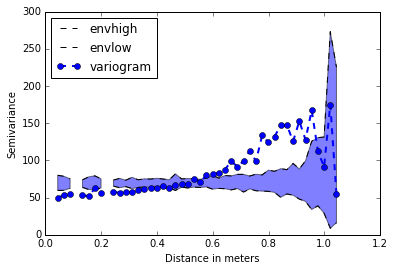

In [18]:
## Empirical Variogram
vg = tools.Variogram(gdata,'Nsp')
vg.plot(n_bins=50,with_envelope=True,refresh=True,percentage_trunked=0)

In [44]:
import numpy as np


minx = min(data.Longitude)
maxx = max(data.Longitude)
miny = min(data.Latitude)
maxy = max(data.Latitude)
grid_sizex = 100
grid_sizey = 100
grid = tools.createGrid(grid_sizex=grid_sizex,grid_sizey=grid_sizey,minx=minx,miny=miny,maxx=maxx,maxy=maxy)

nx = np.linspace(minx,maxx,grid_sizex)
ny = np.linspace(miny,maxy,grid_sizey)
xx, yy = np.meshgrid(nx,ny)


In [45]:
import pymc3 as pm

In [46]:
from statsmodels.genmod.generalized_linear_model import GLM
glmodel = GLM.from_formula('Nsp ~ Elevation_mean + MeanTemperature_mean + Precipitation_mean',data=data)

In [47]:
res = glmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Nsp   No. Observations:                  251
Model:                            GLM   Df Residuals:                      247
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                   49972.6483425
Method:                          IRLS   Log-Likelihood:                -1712.0
Date:                Tue, 20 Feb 2018   Deviance:                   1.2343e+07
Time:                        18:03:24   Pearson chi2:                 1.23e+07
No. Iterations:                     4                                         
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             2881.0998   1113.716      2.587      0.010       698.257  5063.942
Elevation_mean          -0.4527      0.209     -2.164      0.030        -0.863    -0.043
MeanTemperature_mean   -96.0530     39.038     -2.460      0.014      -172.566   -19.540
Precipitation_mean      -2.0364      0.700     -2.908      0.004        -3.409    -0.664
========================================================================================
"""

In [48]:
#cofs = res.params.values[1:]
z = np.array([0.0,0.0])
np.append(z,res.params.values[1:])


array([  0.        ,   0.        ,  -0.45268857, -96.05295056,  -2.03642622])

In [49]:
varnps = data.Nsp.var()
print(varnps)



53854.6263586


In [50]:
## Analysis, GP only one parameter to fit
# The variational method is much beter.


z = np.array([0.0,0.0])
coefs = np.append(z,res.params.values[1:])
from pymc3.variational.callbacks import CheckParametersConvergence

with pm.Model() as model:
    sigma_sq=varnps
    #range_a=10.13
    
    
    #sigma = pm.Uniform('sigma',500,1000)
    #sigma = pm.Normal('sigma',10,5)
    #phi = pm.HalfNormal('phi',mu=8,sd=3)
    #phi = pm.Uniform('phi',6,12)
    #sigma = pm.Flat('sigma')
    #phi = pm.Flat('phi')
    phi = pm.Uniform('phi',0,50)
    #tau_sq = pm.Normal('tau',50,0.3)
    tau_sq = pm.Uniform('tau',0,500)
    
    cov = pm.gp.cov.Constant(sigma_sq) * pm.gp.cov.Matern32(2,phi,active_dims=[0,1]) + pm.gp.cov.Constant(tau_sq)
    #K = cov(grid[['Lon','Lat']].values)
    #phiprint = tt.printing.Print('phi')(phi)
    
    mf = pm.gp.mean.Zero()
    
    #mf = pm.gp.mean.Linear(coeffs=coefs,intercept=res.params.values[0])
    
    
    ## The latent function
    gp = pm.gp.Latent(mean_func=mf, cov_func=cov)
    
    ## I don't know why this
    #f = gp.prior("latent_field",X=data[['Longitude','Latitude','Elevation_mean','MeanTemperature_mean','Precipitation_mean']].values,reparameterize=True)
    f = gp.prior("latent_field", X=data[['Longitude','Latitude']].values,reparameterize=True)
    
    #f_print = tt.printing.Print('latent_field')(f)
    
    y_obs = pm.Poisson('y_obs',mu=f,observed=data.Nsp)
    
    #y_obs = pm.MvNormal('y_obs',mu=np.zeros(n*n),cov=K,observed=grid.Z)
    
    #gp = pm.gp.Latent(cov_func=cov,observed=sample)
    # Use elliptical slice sampling
    #ess_step = pm.EllipticalSlice(vars=[f_sample], prior_cov=K)
    #step = pm.HamiltonianMC()
    #step = pm.Metropolis()
    #%time trace = pm.sample(5000,step)#,tune=0,chains=1)
    ## Variational
    
    %time mean_field = pm.fit(method='advi', callbacks=[CheckParametersConvergence()],n=20000)
    %time trace = mean_field.sample(draws=5000)
with model:    
    
    ## For predicting
    %time f_star = gp.conditional("f_star", grid[['Lon','Lat']].values)
                    
with model:
    ## sampling predictions posterior predictive checks
    pred_samples = pm.sample_ppc(trace, vars=[f_star], samples=1000)


Average Loss = inf: 100%|██████████| 20000/20000 [02:59<00:00, 111.71it/s]

CPU times: user 10min 43s, sys: 11.7 s, total: 10min 55s
Wall time: 3min 1s
CPU times: user 52.6 s, sys: 800 ms, total: 53.4 s
Wall time: 13.6 s


MemoryError: 

In [ ]:
pm.traceplot(trace)

In [ ]:
predf = pred_samples['f_star']

In [ ]:
predff = pd.DataFrame(predf)

In [ ]:
import numpy as np


In [ ]:
plt.pcolormesh(xx,yy,predff.mean().values.reshape(10,10))

In [34]:
data_2 = pd.concat([data,pd.DataFrame({'Zx':map_estimate['latent_field']})],axis=1)

NameError: name 'map_estimate' is not defined

In [ ]:
from external_plugins.spystats.spystats import tools

AttributeError: 'GeoDataFrame' object has no attribute 'Zx'

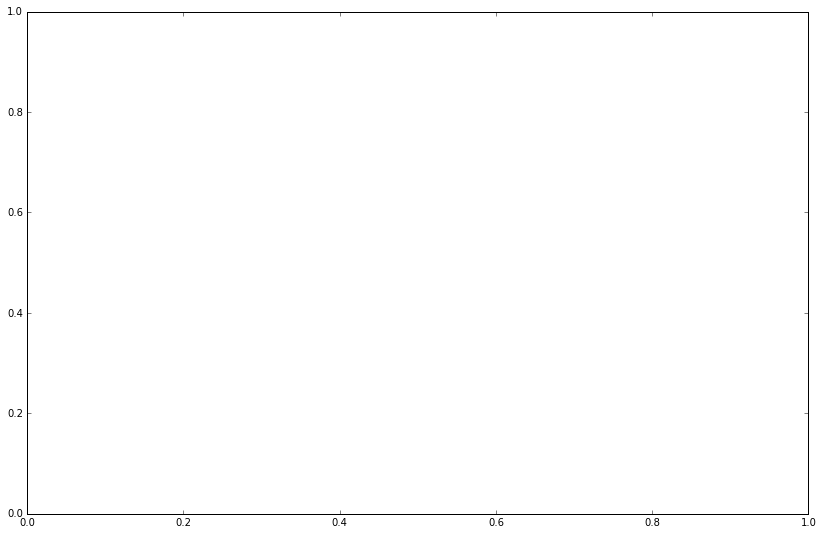

In [35]:
fig, ax = plt.subplots(figsize=(14, 9));
plt.scatter(gdata.Longitude,gdata.Latitude,c=gdata.Zx,s=200)
plt.colorbar()
plt.scatter(gdata.Longitude,gdata.Latitude,c='k',s=gdata.Nsp,alpha=0.5)

#gdata.plot(column='Zx',ax=ax,s=200)

In [ ]:
predff = pd.DataFrame(predf)

In [36]:
from pymc3 import find_MAP
map_estimate = find_MAP(model=model)
map_estimate

ValueError: array must not contain infs or NaNs